# Homework 3 - Species Balance Equations - Part II


In [116]:
import cantera as ct
import numpy as np
import pylab as plt
from math import exp, pi
from scipy.integrate import solve_ivp
import os
import time
import matplotlib as mpl

import sys
module_path = './modules'
sys.path.append(module_path)

from wrappers import IndexedVector, CtInterface
from simulate import derivative, SimpleIntegrator, Simulation
from calc import BCFZY_gas_area_density, BCFZY_elyte_area_density, elyte_frac, BCFZY_frac, O_site_density
from analysis import plot_sol

#reload modules before running
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
cti_path = './cti_files'
ctifile = os.path.join(cti_path,'pcfc_11072018.cti')
#ctifile = os.path.join(cti_path,'pcfc_11072018_test.cti')
#ctifile = os.path.join(cti_path,'pcfc_10252018_mod_thermo.cti')
os.listdir(cti_path)
#pcfc_10252018_mod.cti has atoms for species set based on oxygen lattice so that no species are massless

['pcfc_10252018.cti',
 'pcfc_10252018_mod.cti',
 'pcfc_10252018_mod_thermo.cti',
 'pcfc_11072018.cti',
 'pcfc_11072018_test.cti',
 'pcfc_JH.cti',
 'pcfc_JH_11072018.cti']

In [250]:
dir(gas_ca)
gas_ca.TD = [gas_ca.T,0.4]
gas_ca()


  gas_ca:

       temperature             773  K
          pressure          142703  Pa
           density             0.4  kg/m^3
  mean mol. weight         18.0153  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.2482e+07       -2.249e+08     J
   internal energy     -1.2839e+07       -2.313e+08     J
           entropy           12192        2.196e+05     J/K
    Gibbs function     -2.1906e+07       -3.947e+08     J
 heat capacity c_p          2131.5         3.84e+04     J/K
 heat capacity c_v            1670        3.009e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
               H2O              1                1         -61.4045
     [   +3 minor]              0                0



In [275]:
gas_ca.TP = [gas_ca.T,101325]
#gas_ca()
#sim.initialize(ctifile3)
sim.sim_objs['wBCFZY_gas'].obj.delta_gibbs,sim.sim_objs['wBCFZY_gas'].obj.reactions()

(array([  133522.54213405, 24129900.24915075]),
 [<InterfaceReaction: O(ca_s) + OH(ca_b) <=> O(ca_b) + OH(ca_s)>,
  <InterfaceReaction: H2O + O(ca_s) + Vac(ca_s) <=> 2 OH(ca_s)>])

In [294]:
sim.initialize(ctifile3)
sim.interfaces['BCFZY_gas'].advance_coverages(10000000)
dict(zip(sim.sv_names,sim.init_SV()))

{'Phi_cc': 0.0,
 'Phi_BCFZY': 0.0,
 'Phi_elyte': 0.0,
 'rho_O2': 0.10283346179841052,
 'rho_H2O': 0.00827072804367516,
 'rho_N2': 0.33438218781835555,
 'rho_Ar': 0.006113311290725343,
 'theta_O_ca': 0.006372076230106879,
 'theta_OH_ca': 0.000770425405035942,
 'theta_Vac_ca': 0.9928574983648571,
 'X_OH_el': 0.09,
 'X_OH_ca': 0.09}

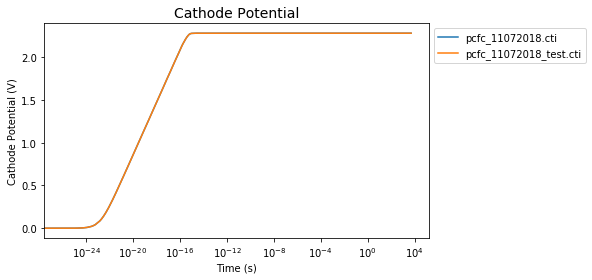

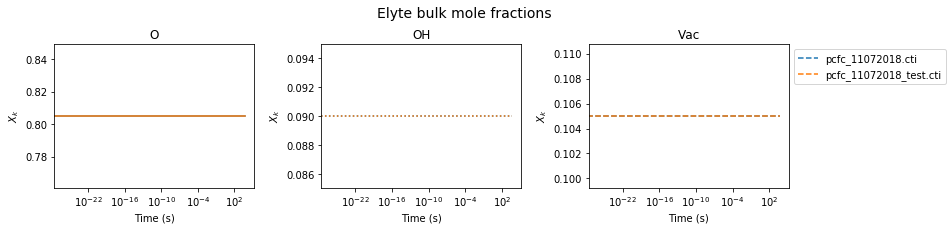

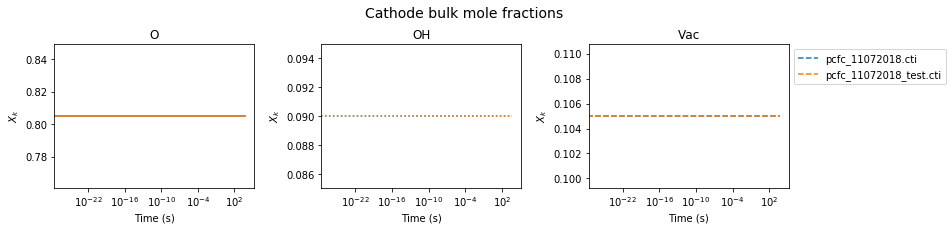

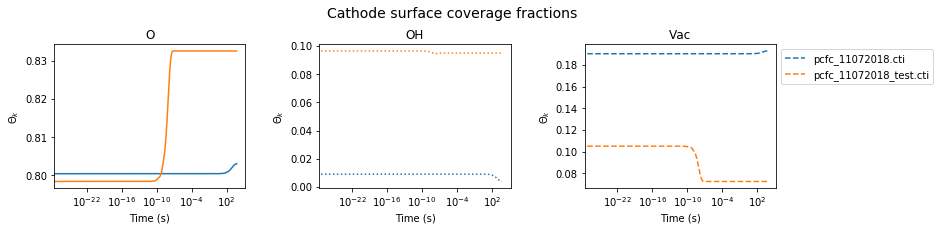

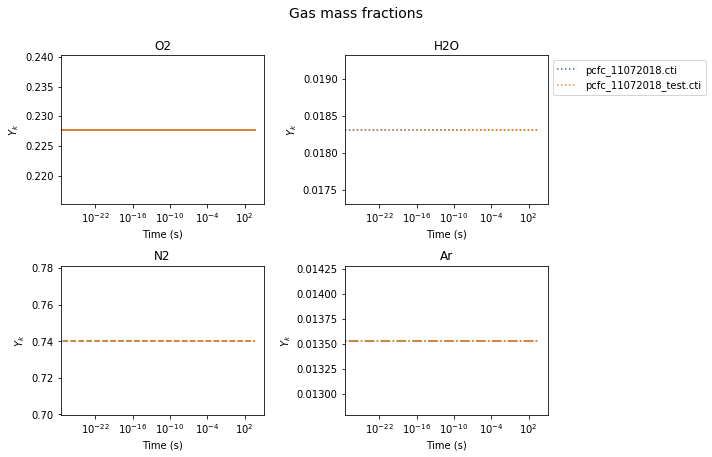

In [297]:
#track all 3 surface coverages
sim = Simulation()
t_span = [0,5e3]
ctifile1 = os.path.join(cti_path,'pcfc_10252018_mod_thermo.cti')
ctifile2 = os.path.join(cti_path,'pcfc_11072018.cti')
ctifile3 = os.path.join(cti_path,'pcfc_11072018_test.cti')

#sim.initialize(ctifile1)
#sim.run(t_span,save_as=os.path.basename(ctifile1))

sim.initialize(ctifile2)
sim.run(t_span,save_as=os.path.basename(ctifile2))

sim.initialize(ctifile3)
sim.run(t_span,save_as=os.path.basename(ctifile3))

axes = sim.plot_runs(exclude=[])

In [ ]:
sim

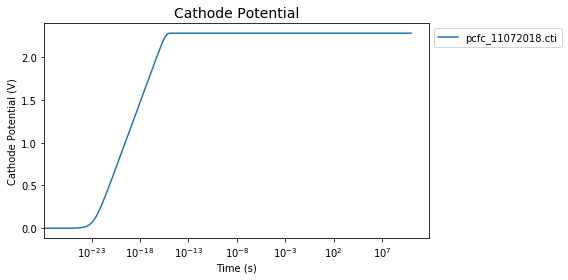

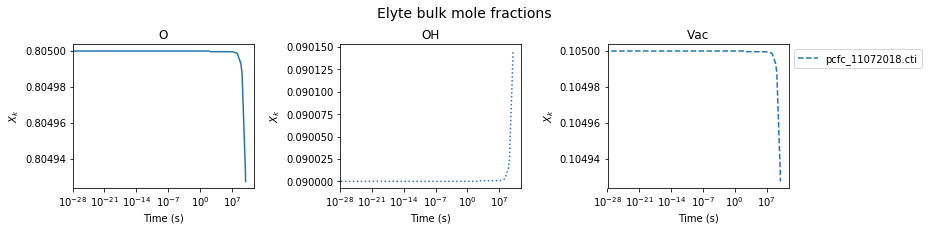

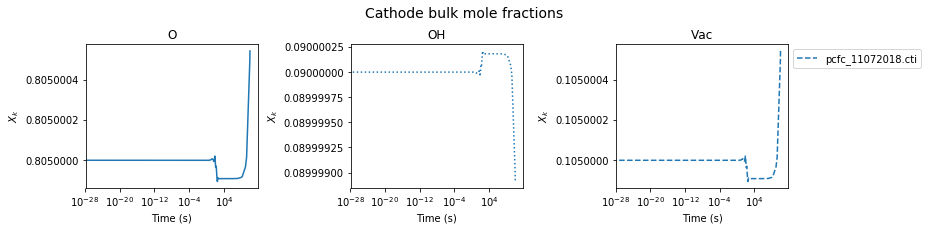

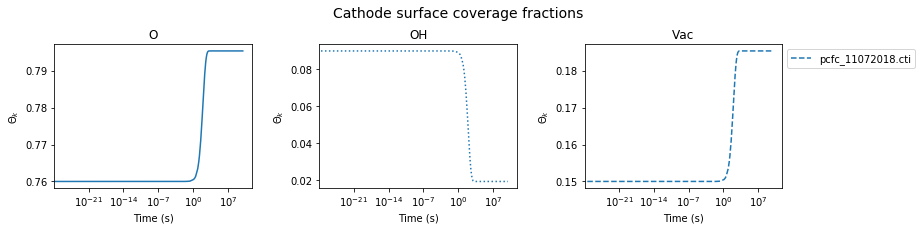

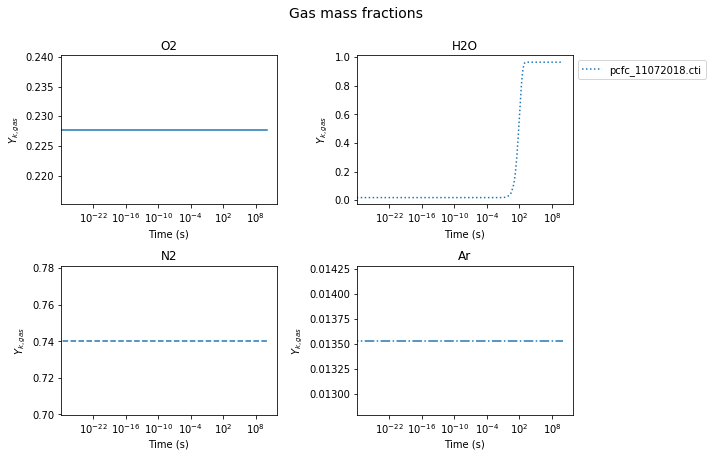

In [221]:
#track only 2 surface coverages
sim = Simulation()
t_span = [0,1e10]
ctifile1 = os.path.join(cti_path,'pcfc_10252018_mod_thermo.cti')
ctifile2 = os.path.join(cti_path,'pcfc_11072018.cti')
ctifile3 = os.path.join(cti_path,'pcfc_11072018_test.cti')
#sim.initialize(ctifile1)
#sim.run(t_span,save_as=os.path.basename(ctifile1))

sim.initialize(ctifile2)
sim.run(t_span,save_as=os.path.basename(ctifile2))

# sim.initialize(ctifile3)
# sim.run(t_span,save_as=os.path.basename(ctifile3))

axes = sim.plot_runs(exclude=[])

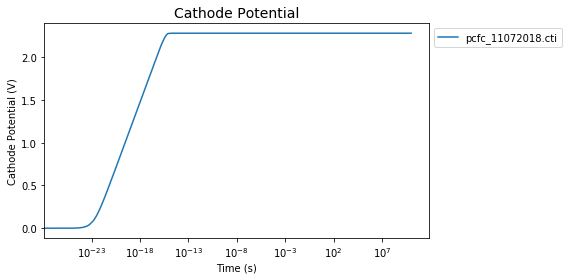

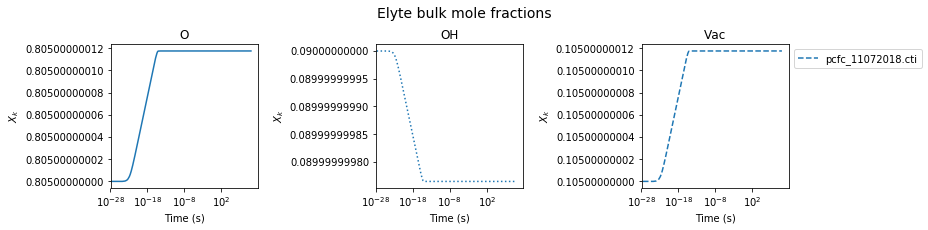

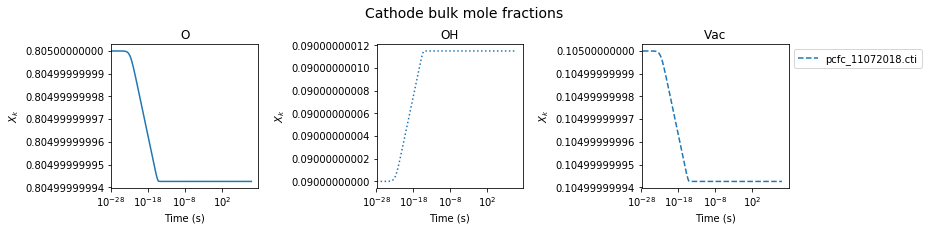

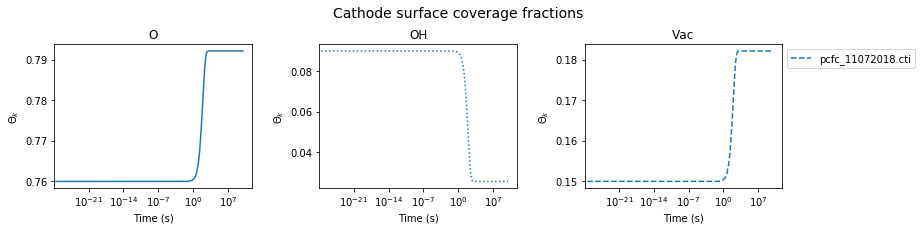

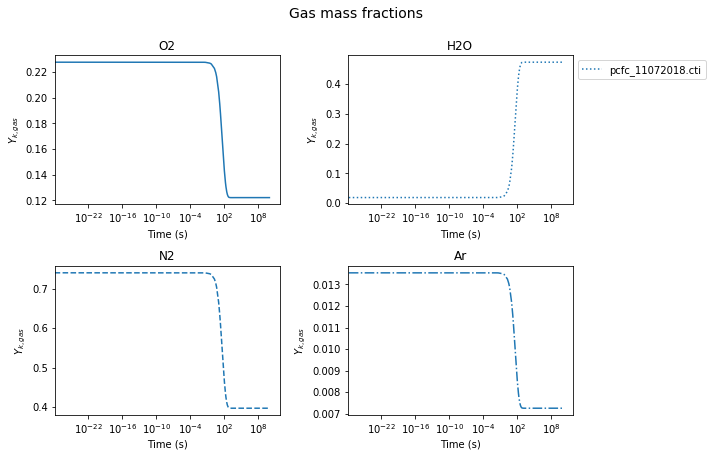

In [253]:
#track all 3 surface coverages
sim = Simulation()
t_span = [0,1e10]
ctifile1 = os.path.join(cti_path,'pcfc_10252018_mod_thermo.cti')
ctifile2 = os.path.join(cti_path,'pcfc_11072018.cti')
ctifile3 = os.path.join(cti_path,'pcfc_11072018_test.cti')
#sim.initialize(ctifile1)
#sim.run(t_span,save_as=os.path.basename(ctifile1))

sim.initialize(ctifile2)
sim.run(t_span,save_as=os.path.basename(ctifile2))

# sim.initialize(ctifile3)
# sim.run(t_span,save_as=os.path.basename(ctifile3))

axes = sim.plot_runs(exclude=[])

In [256]:
-sim.interfaces['BCFZY_elyte'].delta_gibbs/ct.faraday

array([2.28013922])

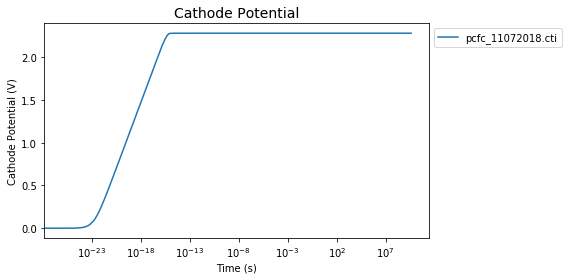

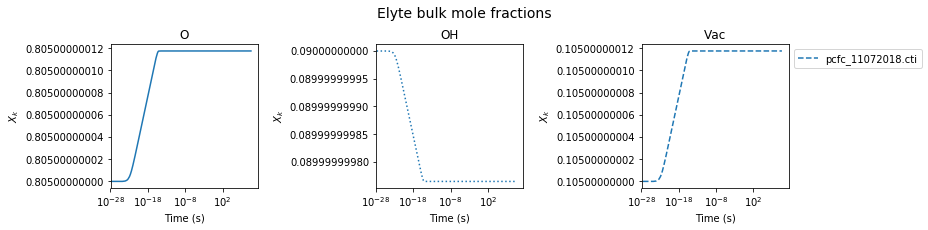

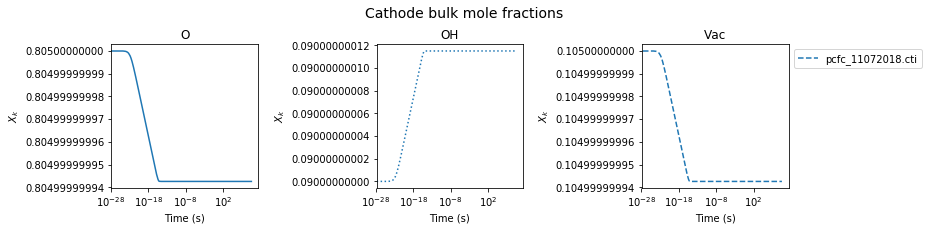

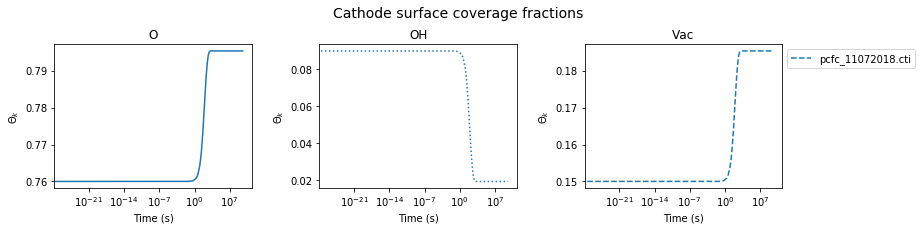

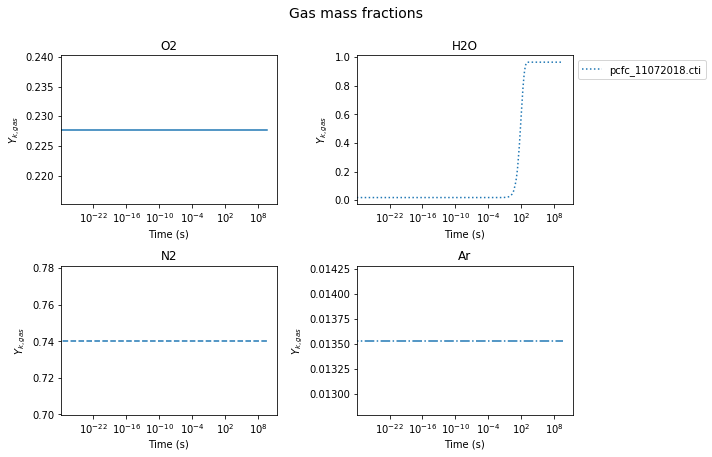

In [201]:
axes = sim.plot_runs(['pcfc_11072018.cti'])

In [179]:

sim.interfaces['BCFZY_elyte'].reactions(), sim.interfaces['BCFZY_elyte'].delta_gibbs

([<InterfaceReaction: O(ca_b) + OH(elyte_b) <=> O(elyte_b) + OH(ca_b)>],
 array([0.]))

In [182]:
ctifile0 = os.path.join(cti_path,'pcfc_10252018.cti')
sim2 = Simulation()
sim2.initialize(ctifile0)
sim.interfaces['BCFZY_elyte'].reactions(), sim.interfaces['BCFZY_elyte'].delta_gibbs

([<InterfaceReaction: O(ca_b) + OH(elyte_b) <=> O(elyte_b) + OH(ca_b)>],
 array([0.]))

In [187]:
ctifile = os.path.join(cti_path,'pcfc_JH.cti')

In [190]:
"Input parameters"
#just model one BCFZY-BCZYYb interface for now
T = 773 #temperature (K)
e_ca = 0.6 #cathode volume fraction (1-porosity)
e_el = 1 #elyte volume fraction (fully dense)
r_ca = 100e-9 #BCFZY particle radius (m)
t_ca = 4000e-6 #cathode thickness (m)
t_el = 4000e-6 #elyte thickness (m)
f_contact = 0.9 #particle contact factor (dimensionless)
i_ext = 0 #constant external current density (A/m2)
Phi_ca_init = 0 #initial anode potential (V)
C_dl = 1e-6 #capacitance of dl per unit area (F/m^2)

"Import phases"
gas_ca = ct.Solution(ctifile,'gas_ca')
BCFZY_bulk = ct.Solution(ctifile,'BCFZY_bulk')
#transition_metal = ct.Solution(ctifile,'transition_metal')
elyte = ct.Solution(ctifile,'elyte')

BCFZY_gas_phases = [gas_ca, BCFZY_bulk]#, transition_metal]
BCFZY_gas = ct.Interface(ctifile,'BCFZY_gas',BCFZY_gas_phases)

BCFZY_elyte_phases = [elyte, BCFZY_bulk]
BCFZY_elyte = ct.Interface(ctifile,'BCFZY_elyte',BCFZY_elyte_phases)

#objs dict
phase_objs = [gas_ca, BCFZY_bulk, elyte]
phase_names = [p.name for p in phase_objs]

objs = dict(zip(phase_names,phase_objs))

#set temperatures
for phase in phase_objs + [BCFZY_gas,BCFZY_elyte]:
    phase.TP = [T,phase.P] #T is not writable

"interface wrappers"
wBCFZY_gas = CtInterface(BCFZY_gas)
wBCFZY_elyte = CtInterface(BCFZY_elyte)

objs['wBCFZY_gas'] = wBCFZY_gas
objs['wBCFZY_elyte'] = wBCFZY_elyte


"Geometric parameters"
A_int = 1 #cathode-elyte interface area per unit area
A_ca_gas = BCFZY_gas_area_density(e_ca,r_ca,f_contact) #cathode-gas interface area per unit volume
A_cael_ca = BCFZY_elyte_area_density(t_ca) #cathode-elyte interface area per unit volume in cathode (only at interface)
A_cael_el = BCFZY_elyte_area_density(t_el) #cathode-elyte interface area per unit volume in elyte (only at interface)

C_Osite_ca = O_site_density(BCFZY_bulk,MW=249.25) #O-site density in BCFZY (kmol/m3)
C_Osite_el = O_site_density(elyte,MW=318.73) #O-site density in BCZYYb (kmol/m3)

"Store parameters in dict"
params = dict(zip(['A_int','A_ca_gas','A_cael_ca','A_cael_el','C_dl','i_ext'],
                  [A_int,A_ca_gas,A_cael_ca,A_cael_el,C_dl,i_ext]))
params['gamma_BCFZY_gas_inv'] = 1/BCFZY_gas.site_density
#params['gamma_BCFZY_elyte_inv'] = 1/BCFZY_elyte.site_density #don't need this- no surface species

#assume fixed n_Ce3, n_Co, n_Fe initially
params['n_Ce3'] = 0.7 #fully reduced - max vacancies
params['n_Co2'] = 0.3 #avg Co ox state = +2.5
params['n_Fe2'] = 0.1 #avg Fe ox state = +3.5
#volume fractions
params['e_ca'] = e_ca
params['e_el'] = e_el
#O-site densities
params['C_Osite_ca'] = C_Osite_ca
params['C_Osite_el'] = C_Osite_el
#gas molar masses
gas_MW = {'O2':2*15.999, 'H2O': 2*1.008 + 15.999, 'N2': 2*14.07,'AR': 39.948}
params['gas_MW'] = [gas_MW[s.name] for s in gas_ca.species()] #vector of gas molar masses - ensure order matches phase order
#total gas density
params['rho_gas_tot'] = gas_ca.density

"Set up initial solution vector"
#list variables
sv_names = [#electric potentials
            'Phi_cc',
            'Phi_BCFZY',
            'Phi_elyte',
            #gas species densities - rho_k = Y_k*rho_gas
            'rho_O2',
            'rho_H2O',
            'rho_N2',
            'rho_Ar',
            #surface coverages in cathode
            'theta_O_ca',
            'theta_OH_ca',
            'theta_Vac_ca',
            #elyte species mole fractions
            'X_OH_el', #only track protons for now - assume Ce oxidation state fixed
            #cathode species mole fractions
            'X_OH_ca' #only track protons for now - assume TM oxidation state fixed
           ]

#set indices for IndexedVector
rho_gas_indices = (sv_names.index('rho_O2'), sv_names.index('rho_Ar') + 1)
theta_ca_indices = (sv_names.index('theta_O_ca'), sv_names.index('theta_Vac_ca') + 1)
X_elyte_indices = (sv_names.index('X_OH_el'), sv_names.index('X_OH_el') + 1)
X_ca_indices = (sv_names.index('X_OH_ca'), sv_names.index('X_OH_ca') + 1)

SV_indices = dict(zip(['rho_gas','theta_ca','X_elyte','X_ca'], [rho_gas_indices,theta_ca_indices, X_elyte_indices, X_ca_indices]))
SV_indices['Phi_cc'] = (sv_names.index('Phi_cc'), sv_names.index('Phi_cc') + 1)
SV_indices['Phi_BCFZY'] = (sv_names.index('Phi_BCFZY'), sv_names.index('Phi_BCFZY') + 1)
SV_indices['Phi_elyte'] = (sv_names.index('Phi_elyte'), sv_names.index('Phi_elyte') + 1)

SV_0 = np.zeros_like(sv_names,dtype=float)

#IndexedVector for easier value setting
SV_0 = IndexedVector(SV_0,SV_indices)
SV_0.set_val('Phi_BCFZY',Phi_ca_init) #initial cathode potential
SV_0.set_val('X_elyte', 0.09) #match cti file
SV_0.set_val('X_ca', 0.09) #match cti file
SV_0.set_val('theta_ca',[0.76,0.09,0.15]) #match cti file X
SV_0.set_val('rho_gas', gas_ca.density*gas_ca.Y[0:SV_0.len('rho_gas')]) #match cti file

#pull vector back out of IndexedVector
SV_0 = SV_0.vector

In [191]:
BCFZY_elyte.delta_gibbs

array([0.])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E03842C748>,
      dtype=object)

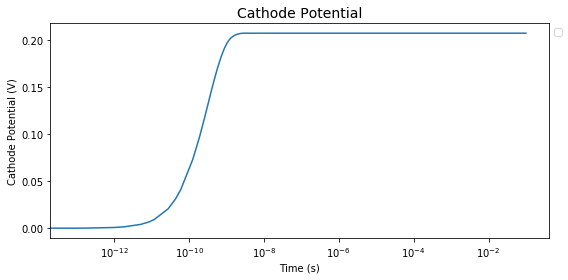

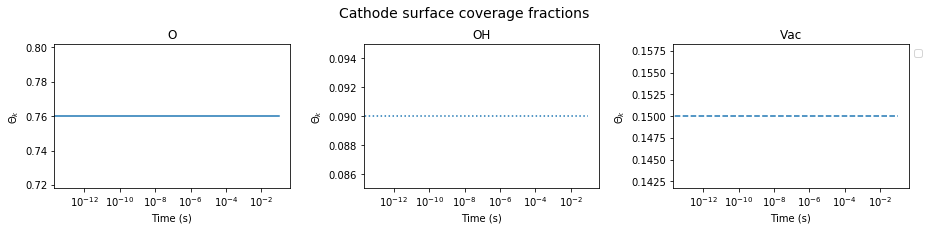

In [192]:
"Run with solve_ivp to divergent state"
"All species fraction derivatives turned off except surface coverages"

sol1 = solve_ivp(lambda t, y: derivative(t, y, SV_indices, params,objs, scale=1e-14),\
    [0, 1e-1], SV_0, method='BDF')

plot_sol(sol1,sv_names,params,exclude=['X_elyte','X_ca','Y_gas'])

In [40]:
BCFZY_gas.reactions(), BCFZY_gas.delta_gibbs

([<InterfaceReaction: H2O + O(ca_s) + Vac(ca_s) <=> 2 OH(ca_s)>],
 array([42584050.20323253]))

In [5]:
"capture end state"
SV_end = sol1['y'][:,sol1['y'].shape[1] - 1]

In [6]:
"Check direction of derivatives at this state"
d = derivative(0, SV_end, SV_indices, params,objs, scale=1e-14)
dict(zip(sv_names,d))

{'Phi_cc': 0.0,
 'Phi_BCFZY': -3089.9538203334923,
 'Phi_elyte': 0.0,
 'rho_O2': 0.0,
 'rho_H2O': 0.0,
 'rho_N2': 0.0,
 'rho_Ar': 0.0,
 'theta_O_ca': -4025626.0319249467,
 'theta_OH_ca': 4025626.031926241,
 'theta_Vac_ca': -1.2943295185115539e-06,
 'X_OH_el': 0.0,
 'X_OH_ca': 0.0}

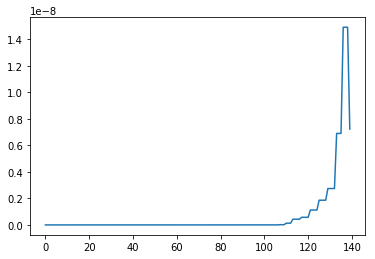

In [7]:
"check step sizes taken by integrator"
t_steps = sol1['t'][1:]  - sol1['t'][:-1]
plt.plot(t_steps)

In [8]:
BCFZY_gas()


  BCFZY_gas:

       temperature             773  K
          pressure          101325  Pa
           density     7.02562e-07  kg/m^3
  mean mol. weight         41.0459  amu
         potential        0.207297  V

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.3065e+06       -1.357e+08     J
   internal energy     -3.3065e+06       -1.357e+08     J
           entropy          132.46             5437     J/K
    Gibbs function     -3.4089e+06       -1.399e+08     J
 heat capacity c_p               0                0     J/K
 heat capacity c_v               0                0     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
           O(ca_s)       0.565495         0.661278         -37.8814
         Vac(ca_s)       0.434505         0.338722        -0.802909
     [   +1 minor]              0                0



At this point, the sign of the derivative is inconsistent with the evolution of the system. If I integrate for a longer time, $\theta_{OH}$ will continue to decrease. To investigate this, I run `solve_ivp` using the end point of the above integration as a starting point. For comparison, I also run a simple integrator with a constant timestep.

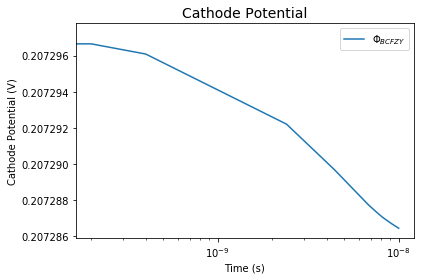

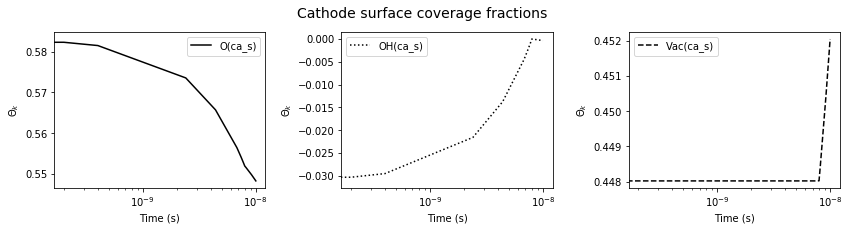

In [9]:
tstart = 0 #this doesn't matter for integration but affects scaling of plots
tspan = 1e-8
sol2 = solve_ivp(lambda t, y: derivative(t, y, SV_indices, params,objs, scale=1e-14),\
    [tstart, tstart + tspan], SV_end, method='BDF')

plot_sol(sol2,sv_names,params,exclude=['X_elyte','X_ca','Y_gas'])

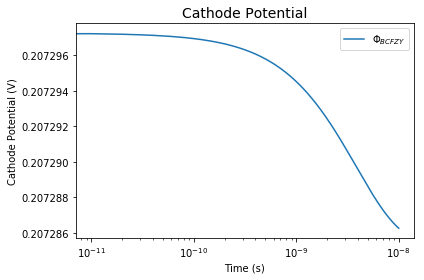

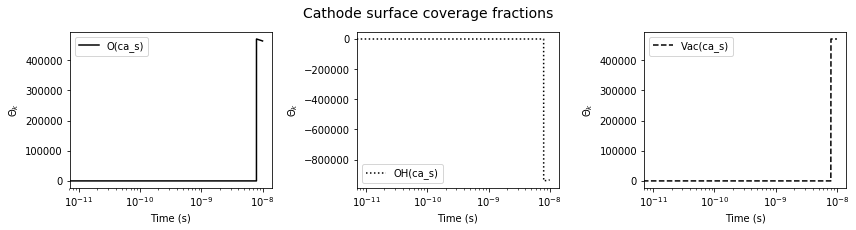

In [10]:
integrator = SimpleIntegrator()

sol2b = integrator.run(derivative, [tstart, tstart+tspan], tspan/1000, SV_end, SV_indices=SV_indices, params=params,objs=objs, scale=1e-14)

plot_sol(sol2b,sv_names,params,exclude=['X_elyte','X_ca','Y_gas'])

Both integrators show similar results: $\theta_{OH}$ initially increases, but starts to decrease once it becomes positive. The drop is much more dramatic in the simple integrator because it does not intelligently choose a timestep. Below I identify the state of the system that results in the large drop in $\theta_{OH}$ in the simple integrator, calculate the derivative at this step, and check the state of the interface.

[ 2.89241588e-05 -9.40885501e+05]


Text(0,0.5,'$\\Theta_{OH}$')

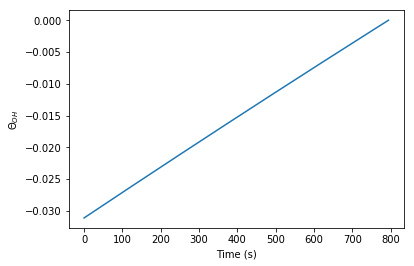

In [12]:
#find large step in theta_OH
y2b = dict(zip(sv_names,sol2b['y']))
d_theta_OH = y2b['theta_OH_ca'][1:] - y2b['theta_OH_ca'][:-1]
idx = np.argmin(d_theta_OH)
#show vals before and after step
print(y2b['theta_OH_ca'][idx:idx+2])
#plot theta_OH up to step
plt.plot(y2b['theta_OH_ca'][:idx])
plt.xlabel('Time (s)')
plt.ylabel(r'$\Theta_{OH}$')

In [13]:
"check values immediately before step"
SV_prestep = sol2b['y'][:,idx]
dict(zip(sv_names,SV_prestep))

{'Phi_cc': 0.0,
 'Phi_BCFZY': 0.2072868734493171,
 'Phi_elyte': 0.0,
 'rho_O2': 0.10285341654520193,
 'rho_H2O': 0.008272332971497348,
 'rho_N2': 0.3344470744007265,
 'rho_Ar': 0.006114497573640749,
 'theta_O_ca': 0.5519472574229791,
 'theta_OH_ca': 2.8924158804318717e-05,
 'theta_Vac_ca': 0.4480238184172304,
 'X_OH_el': 0.09,
 'X_OH_ca': 0.09}

In [14]:
"calculate derivative at step"
d = derivative(0, SV_prestep, SV_indices, params,objs, scale=1e-14)
dict(zip(sv_names,d))

{'Phi_cc': 0.0,
 'Phi_BCFZY': -388.18958187643966,
 'Phi_elyte': 0.0,
 'rho_O2': 0.0,
 'rho_H2O': 0.0,
 'rho_N2': 0.0,
 'rho_Ar': 0.0,
 'theta_O_ca': 4.704427503173704e+16,
 'theta_OH_ca': -9.408855006728296e+16,
 'theta_Vac_ca': 4.704427503554591e+16,
 'X_OH_el': 0.0,
 'X_OH_ca': 0.0}

At this step, the surface fraction of OH is very strongly decreasing.

In [15]:
"check state of BCFZY-gas interface"
BCFZY_gas()


  BCFZY_gas:

       temperature             773  K
          pressure          101325  Pa
           density     6.77772e-07  kg/m^3
  mean mol. weight         40.8296  amu
         potential        0.207287  V

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -3.2445e+06       -1.325e+08     J
   internal energy     -3.2445e+06       -1.325e+08     J
           entropy          140.11             5721     J/K
    Gibbs function     -3.3528e+06       -1.369e+08     J
 heat capacity c_p               0                0     J/K
 heat capacity c_v               0                0     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
           O(ca_s)       0.551947         0.648854         -37.9363
          OH(ca_s)    2.89242e-05      3.47161e-05           -26.01
         Vac(ca_s)       0.448024         0.351111  

In [16]:
"check production rates"
wBCFZY_gas.species_production_rates

{'O2': -6.3766051593773075e-22,
 'H2O': 780934965.5900621,
 'N2': 0.0,
 'AR': 0.0,
 'O(ca_b)': 0.06322726247807606,
 'OH(ca_b)': -0.06322726247807606,
 'Vac(ca_b)': 0.0,
 'TM': -2.550642063750923e-21,
 'TM_hole': 2.550642063750923e-21,
 'O(ca_s)': 780934965.5268348,
 'OH(ca_s)': -1561869931.116897,
 'Vac(ca_s)': 780934965.5900621}

In [17]:
"double check production rates without wrapper"
BCFZY_gas.net_production_rates, BCFZY_gas.species()

(array([-6.37660516e-22,  7.80934966e+08,  0.00000000e+00,  0.00000000e+00,
         6.32272625e-02, -6.32272625e-02,  0.00000000e+00, -2.55064206e-21,
         2.55064206e-21,  7.80934966e+08, -1.56186993e+09,  7.80934966e+08]),
 [<Species O(ca_s)>, <Species OH(ca_s)>, <Species Vac(ca_s)>])

In [18]:
"which reaction is driving the net destruction of OH(ca_s)?"
BCFZY_gas.reactions(), BCFZY_gas.net_rates_of_progress

([<InterfaceReaction: O(ca_s) + OH(ca_b) <=> O(ca_b) + OH(ca_s)>,
  <InterfaceReaction: H2O + O(ca_s) + Vac(ca_s) <=> 2 OH(ca_s)>,
  <InterfaceReaction: O2 + 4 TM + 2 Vac(ca_s) <=> 2 O(ca_s) + 4 TM_hole>],
 array([ 6.32272625e-02, -7.80934966e+08,  6.37660516e-22]))

In [19]:
"check delta G of hydration reaction"
BCFZY_gas.delta_gibbs[1]

334222719.2122663

The hydration reaction has a very strong thermo driving force to proceed in reverse (i.e. destroy surface OH to evolve gaseous water), even though there are almost no OH present on the surface. This seems like it may be an issue with the thermo in the CTI file. The enthalpies for O, OH, and Vac in the CTI file seem reasonable - O is lowest energy, followed by OH and Vac. I'm not sure how to interpret the format for H2O.

To test the effect of thermo, I modified $h_0$ for all OH species in the CTI file, setting them to -240 kJ/mol, the same as for O, and reran the simulation.

In [20]:
#pcfc_10252018_mod_thermo.cti has h0 for all OH species set to -240
ctifile = os.path.join(cti_path,'pcfc_10252018_mod_thermo.cti')

"Input parameters"
#just model one BCFZY-BCZYYb interface for now
T = 773 #temperature (K)
e_ca = 0.6 #cathode volume fraction (1-porosity)
e_el = 1 #elyte volume fraction (fully dense)
r_ca = 100e-9 #BCFZY particle radius (m)
t_ca = 4000e-6 #cathode thickness (m)
t_el = 4000e-6 #elyte thickness (m)
f_contact = 0.9 #particle contact factor (dimensionless)
i_ext = 0 #constant external current density (A/m2)
Phi_ca_init = 0 #initial anode potential (V)
C_dl = 1e-6 #capacitance of dl per unit area (F/m^2)

"Import phases"
gas_ca = ct.Solution(ctifile,'gas_ca')
BCFZY_bulk = ct.Solution(ctifile,'BCFZY_bulk')
transition_metal = ct.Solution(ctifile,'transition_metal')
elyte = ct.Solution(ctifile,'elyte')

BCFZY_gas_phases = [gas_ca, BCFZY_bulk, transition_metal]
BCFZY_gas = ct.Interface(ctifile,'BCFZY_gas',BCFZY_gas_phases)

BCFZY_elyte_phases = [elyte, BCFZY_bulk]
BCFZY_elyte = ct.Interface(ctifile,'BCFZY_elyte',BCFZY_elyte_phases)

#objs dict
phase_objs = [gas_ca, BCFZY_bulk, elyte]
phase_names = [p.name for p in phase_objs]

objs = dict(zip(phase_names,phase_objs))

#set temperatures
for phase in phase_objs + [BCFZY_gas,BCFZY_elyte]:
    phase.TP = [T,phase.P] #T is not writable

"interface wrappers"
wBCFZY_gas = CtInterface(BCFZY_gas)
wBCFZY_elyte = CtInterface(BCFZY_elyte)

objs['wBCFZY_gas'] = wBCFZY_gas
objs['wBCFZY_elyte'] = wBCFZY_elyte


"Geometric parameters"
A_int = 1 #cathode-elyte interface area per unit area
A_ca_gas = BCFZY_gas_area_density(e_ca,r_ca,f_contact) #cathode-gas interface area per unit volume
A_cael_ca = BCFZY_elyte_area_density(t_ca) #cathode-elyte interface area per unit volume in cathode (only at interface)
A_cael_el = BCFZY_elyte_area_density(t_el) #cathode-elyte interface area per unit volume in elyte (only at interface)

C_Osite_ca = O_site_density(BCFZY_bulk,MW=249.25) #O-site density in BCFZY (kmol/m3)
C_Osite_el = O_site_density(elyte,MW=318.73) #O-site density in BCZYYb (kmol/m3)

"Store parameters in dict"
params = dict(zip(['A_int','A_ca_gas','A_cael_ca','A_cael_el','C_dl','i_ext'],
                  [A_int,A_ca_gas,A_cael_ca,A_cael_el,C_dl,i_ext]))
params['gamma_BCFZY_gas_inv'] = 1/BCFZY_gas.site_density
#params['gamma_BCFZY_elyte_inv'] = 1/BCFZY_elyte.site_density #don't need this- no surface species

#assume fixed n_Ce3, n_Co, n_Fe initially
params['n_Ce3'] = 0.7 #fully reduced - max vacancies
params['n_Co2'] = 0.3 #avg Co ox state = +2.5
params['n_Fe2'] = 0.1 #avg Fe ox state = +3.5
#volume fractions
params['e_ca'] = e_ca
params['e_el'] = e_el
#O-site densities
params['C_Osite_ca'] = C_Osite_ca
params['C_Osite_el'] = C_Osite_el
#gas molar masses
gas_MW = {'O2':2*15.999, 'H2O': 2*1.008 + 15.999, 'N2': 2*14.07,'AR': 39.948}
params['gas_MW'] = [gas_MW[s.name] for s in gas_ca.species()] #vector of gas molar masses - ensure order matches phase order
#total gas density
params['rho_gas_tot'] = gas_ca.density

"Set up initial solution vector"
#list variables
sv_names = [#electric potentials
            'Phi_cc',
            'Phi_BCFZY',
            'Phi_elyte',
            #gas species densities - rho_k = Y_k*rho_gas
            'rho_O2',
            'rho_H2O',
            'rho_N2',
            'rho_Ar',
            #surface coverages in cathode
            'theta_O_ca',
            'theta_OH_ca',
            'theta_Vac_ca',
            #elyte species mole fractions
            'X_OH_el', #only track protons for now - assume Ce oxidation state fixed
            #cathode species mole fractions
            'X_OH_ca' #only track protons for now - assume TM oxidation state fixed
           ]

#set indices for IndexedVector
rho_gas_indices = (sv_names.index('rho_O2'), sv_names.index('rho_Ar') + 1)
theta_ca_indices = (sv_names.index('theta_O_ca'), sv_names.index('theta_Vac_ca') + 1)
X_elyte_indices = (sv_names.index('X_OH_el'), sv_names.index('X_OH_el') + 1)
X_ca_indices = (sv_names.index('X_OH_ca'), sv_names.index('X_OH_ca') + 1)

SV_indices = dict(zip(['rho_gas','theta_ca','X_elyte','X_ca'], [rho_gas_indices,theta_ca_indices, X_elyte_indices, X_ca_indices]))
SV_indices['Phi_cc'] = (sv_names.index('Phi_cc'), sv_names.index('Phi_cc') + 1)
SV_indices['Phi_BCFZY'] = (sv_names.index('Phi_BCFZY'), sv_names.index('Phi_BCFZY') + 1)
SV_indices['Phi_elyte'] = (sv_names.index('Phi_elyte'), sv_names.index('Phi_elyte') + 1)

SV_0 = np.zeros_like(sv_names,dtype=float)

#IndexedVector for easier value setting
SV_0 = IndexedVector(SV_0,SV_indices)
SV_0.set_val('Phi_BCFZY',Phi_ca_init) #initial cathode potential
SV_0.set_val('X_elyte', 0.09) #match cti file
SV_0.set_val('X_ca', 0.09) #match cti file
SV_0.set_val('theta_ca',[0.76,0.09,0.15]) #match cti file X
SV_0.set_val('rho_gas', gas_ca.density*gas_ca.Y[0:SV_0.len('rho_gas')]) #match cti file

#pull vector back out of IndexedVector
SV_0 = SV_0.vector

set species
set species indices
set phase species indices
set phase species
set species
set species indices
set phase species indices
set phase species


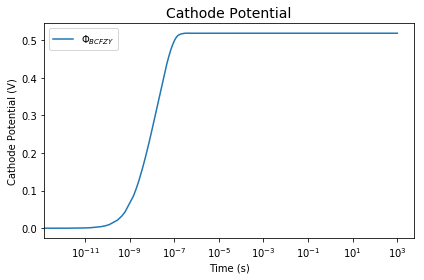

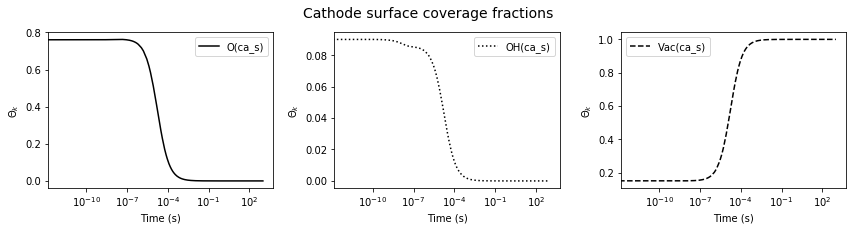

In [21]:
"Run with solve_ivp to divergent state"
"All species fraction derivatives turned off except surface coverages"

sol3 = solve_ivp(lambda t, y: derivative(t, y, SV_indices, params,objs, scale=1e-14),\
    [0, 1000], SV_0, method='BDF')

plot_sol(sol3,sv_names,params,exclude=['X_elyte','X_ca','Y_gas'])

The results here don't really make sense physically, but the solution at least seems to be stable.